Цель задачи: подготовить модели для предсказания доходов ресторана, оценить их результаты.

Набор данных включает 137 ресторанов в обучающей выборке и тестовую выборку из 100 000 ресторанов.
Столбцы данных включают дату открытия, местоположение, тип города,
и три категории запутанных данных: демографические данные, данные о недвижимости и коммерческие данные.
Столбец дохода показывает (преобразованный) доход ресторана в данном году и является целью прогнозного анализа.

Таким образом перед нами задача регрессии

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Для начала посмотрим на наши данные

In [ ]:
data_train=pd.read_csv("/content/drive/MyDrive/softarex/income-prediction/train.csv")
data_test=pd.read_csv("/content/drive/MyDrive/softarex/income-prediction/test.csv")
sample_submission=pd.read_csv("/content/drive/MyDrive/softarex/income-prediction/sampleSubmission.csv")
data_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


Видим что у нас есть 43 столбца из них 39 численных и 4 категориальных

In [ ]:
data_train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


Посмотрим распределение целевой переменной:

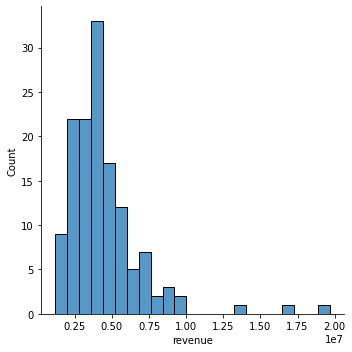

In [ ]:
sns.displot(x='revenue',
            data=data_train);

На графике видно что прибыль неравномерно распределена и есть случайные выбросы

# Feature Engineering

Выкинем выброс прибыли для более точных результатов


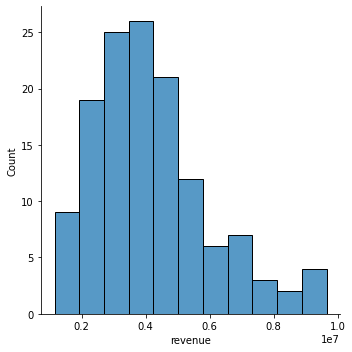

In [ ]:
data_train=data_train.loc[data_train['revenue']<10000000]
sns.displot(x='revenue',
            data=data_train);

здесь распределение прибыли уже похоже на нормальное 

In [ ]:
target='revenue'
p_cols=[i for i in list(data_train.columns)][5:-1]
cat_cols=[i for i in list(data_train.columns)][2:5]

In [ ]:
for i in cat_cols:
  print(str(len(data_train[i].unique())),i)
for i in cat_cols:
  print(str(len(data_test[i].unique())),i)

34 City
2 City Group
3 Type
57 City
2 City Group
4 Type


Заметим, что количество различных городов и типов ресторанов отличаются

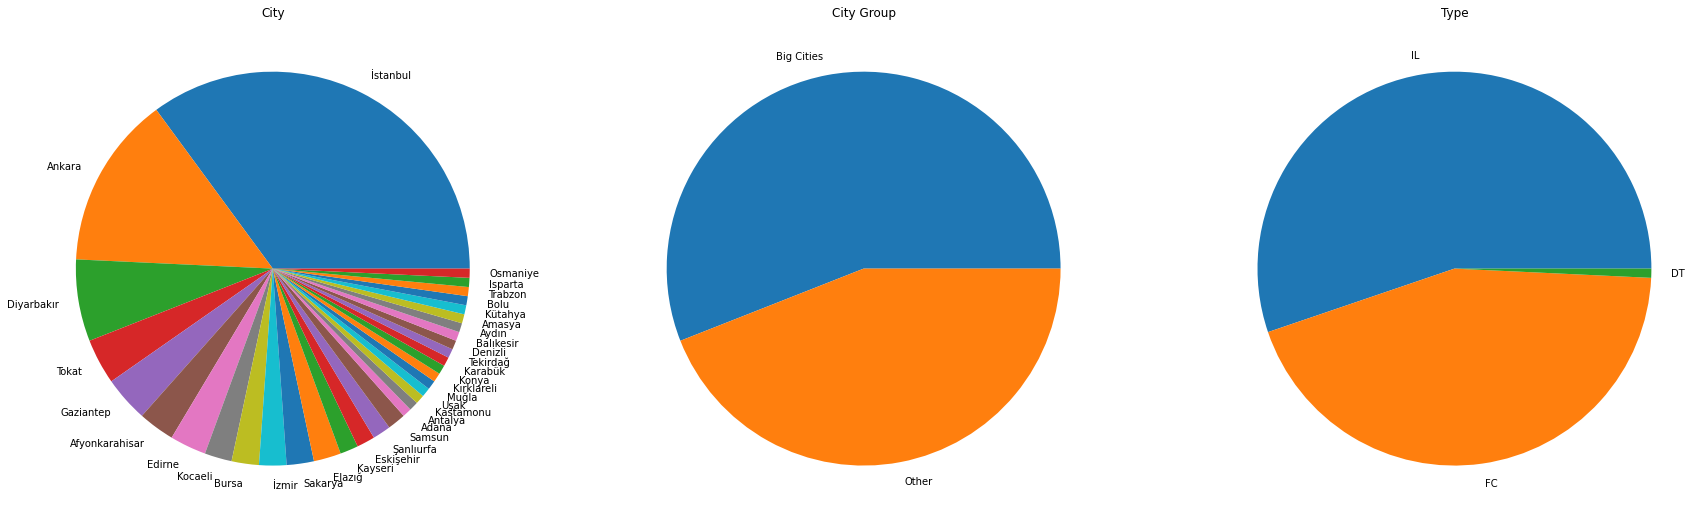

In [ ]:
plt.subplots(2,2,figsize=(30,30))
for col in range(len(cat_cols)):
  b = data_train[cat_cols[col]].value_counts()
  plt.subplot(1,3, col+1)
  plt.pie(b.values,labels=data_train[cat_cols[col]].unique())
  plt.title(cat_cols[col])

видим что группы городов имеют две почти равные группы, а вот типы ресторанов и города распределены не равномерно

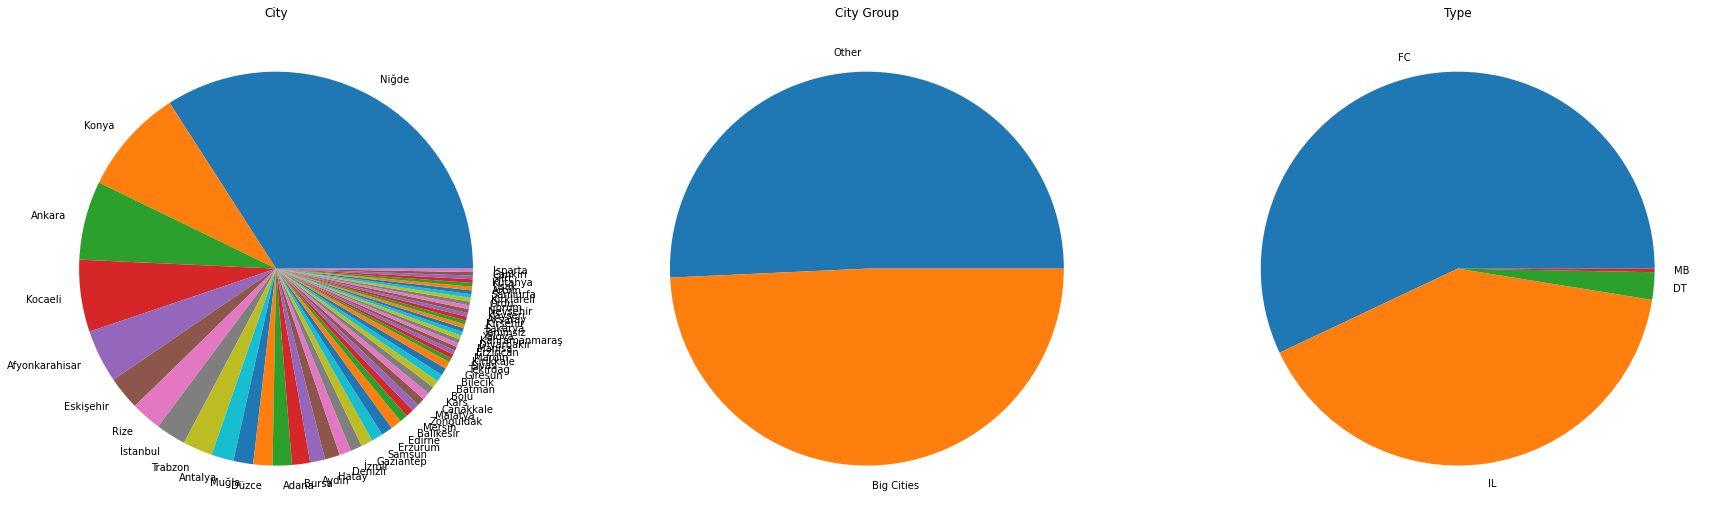

In [ ]:
plt.subplots(2,2,figsize=(30,30))
for col in range(len(cat_cols)):
  b = data_test[cat_cols[col]].value_counts()
  plt.subplot(1,3, col+1)
  plt.pie(b.values,labels=data_test[cat_cols[col]].unique())
  plt.title(cat_cols[col])

В тестовой выборке вообще присутствует 4ый тип, отсутствующий на обучающей. Его можно выкинуть без потери точности

Так же города распределены абсолютно по разному, на тестовой выборке большую часть городов занимает Стамбул и Анкара, однако в тестовой город Nigde и Konya. Я считаю, что зависимость которую может дать признак город я получу из группы городов, поэтому я решил не использовать такой признак как название города

In [ ]:
cat_cols=[i for i in list(data_train.columns)][3:5]
cat_cols

['City Group', 'Type']

заменем MB на DT в тестовой выборке тк доля слишком маленькая

In [ ]:
data_test.loc[data_test['Type']=='MB','Type']='DT'


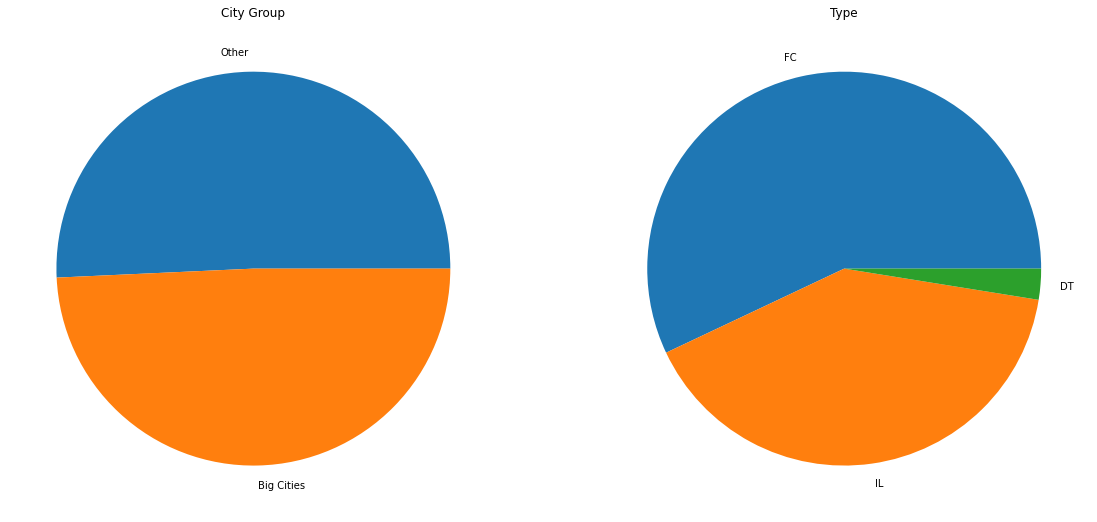

In [ ]:

plt.subplots(2,2,figsize=(30,30))
for col in range(len(cat_cols)):
  b = data_test[cat_cols[col]].value_counts()
  plt.subplot(1,3, col+1)
  plt.pie(b.values,labels=data_test[cat_cols[col]].unique())
  plt.title(cat_cols[col])

тип распределен не одинаково, но доля DT все же существенная

**влияние p1-p36 на revenue**

Теперь проанализируем влияние запутанных данных на целевую переменную и попробуем выявить какую-нибудь закономерность

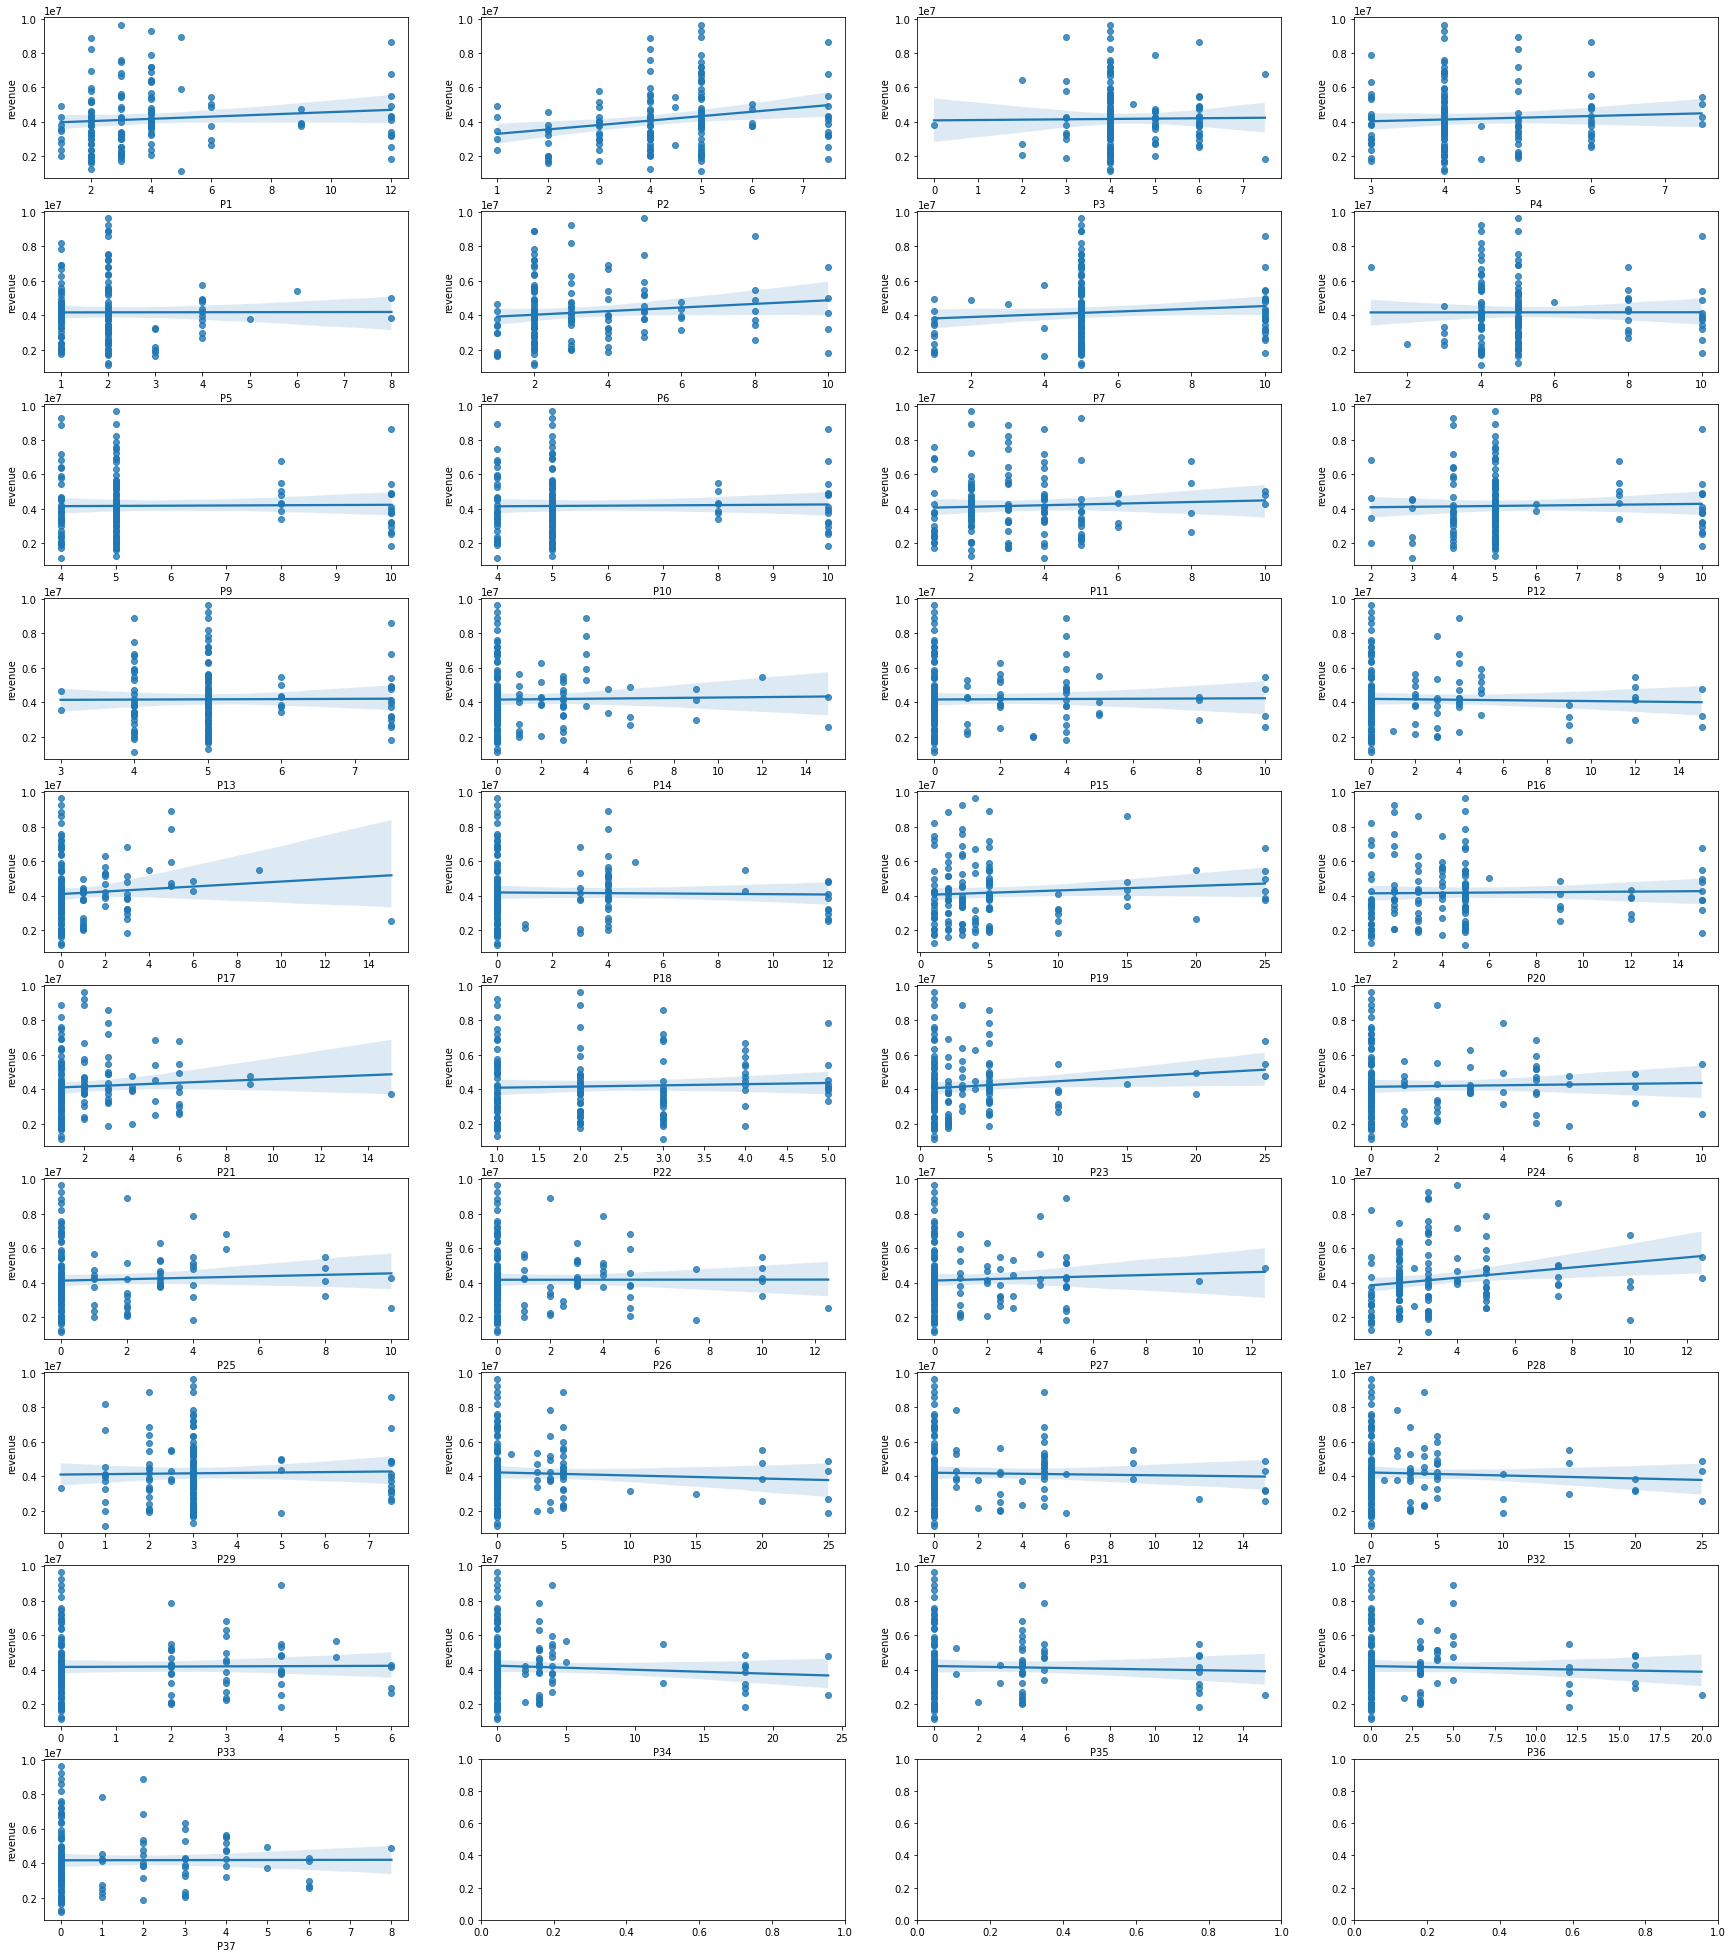

In [ ]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(p_cols, ax.flatten()):
    sns.regplot(x=data_train[variable], y=data_train['revenue'], ax=subplot)

Здесь на графиках представлена зависимость P1-P37 от прибыли. На большинстве графиков прибыль не зависит от параметра, тк какое-то значение параметра встречается на всех результатах прибыли
Можно попытаться выбрать те параметры, от значения которых зависит прибыль

Выберем те которые более менее похожи на зависимости

In [ ]:
p_cols_true=['P1','P2','P6','P11','P19','P20','P21','P28','P37']

разобьем дату основания ресторана на дни с открытия ресторана, год открытия и месяц открытия

In [ ]:
from google.colab import output
data_train['OpenDays']=(pd.to_datetime("07/07/2022")-pd.to_datetime(data_train['Open Date'])).dt.days.astype('int16')
data_train['Year']=pd.to_datetime(data_train['Open Date']).dt.year
data_train['Month']=pd.to_datetime(data_train['Open Date']).dt.month
data_train=data_train.drop('Open Date', axis=1)
output.clear()

In [ ]:
data_train

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Year,Month
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753.0,8391,1999,7
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131.0,5257,2008,2
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379.0,3407,2013,3
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511.0,3808,2012,2
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715.0,4807,2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,0,0,0,0,0,0,5787594.0,5125,2008,6
133,133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,0,0,0,0,0,0,9262754.0,5747,2006,10
134,134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,2544857.0,5843,2006,7
135,135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,0,0,0,0,0,0,7217634.0,4269,2010,10


In [ ]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
p_data=data_train[p_cols]
cat_data=data_train[cat_cols]
dummy_features = pd.get_dummies(cat_data)
time_data=data_train[['OpenDays','Year','Month']]
time_data.head()
X = pd.concat([dummy_features,time_data,data_train[p_cols_true]], axis=1)
y=data_train[target]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

# линейные модели

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error, r2_score
import xgboost

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge,LassoCV, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ARDRegression
import lightgbm as lgbm
from sklearn.ensemble import VotingRegressor

Для начала разберем подходы для решения задачи регрессии:

1) линейные модели

2) решающие деревья

3) нейронные сети

В качестве метрики я возьму 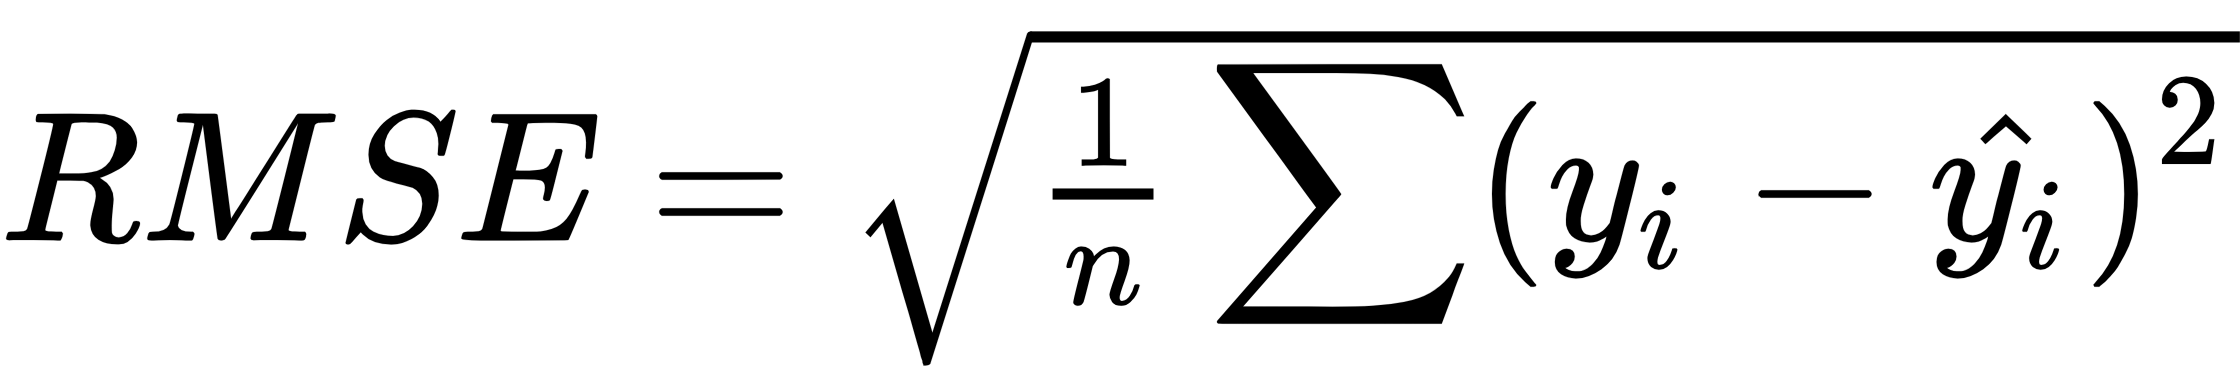

А также r^2
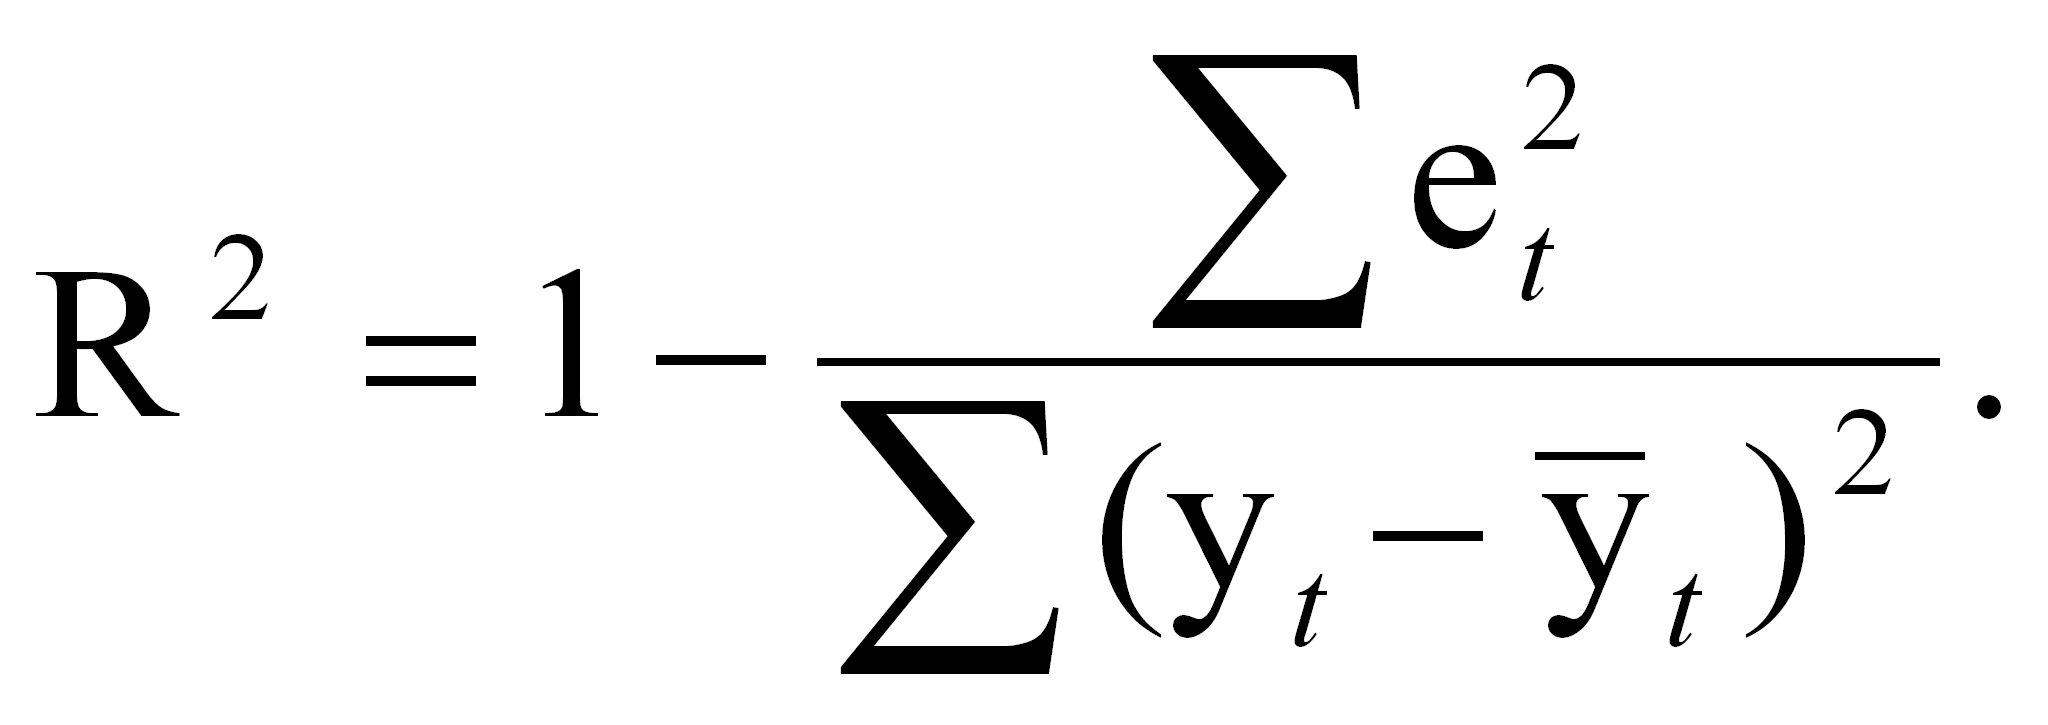

Попробуем линейные модели, метод к-ближайших соседей, а так же дерево решений

Создадим пайплайн, в котором сразу будет проводиться нормализация, а потом применяться модель.

KNeighborsRegressor()
1906643.1065186143
-0.009667493237728308


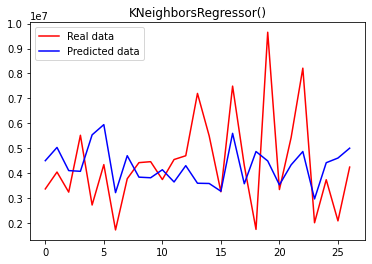

LinearRegression()
1961837.4086485656
-0.06897015942872087


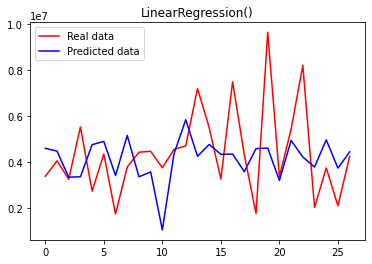

LassoCV()
1891179.7549033603
0.006643405619049969


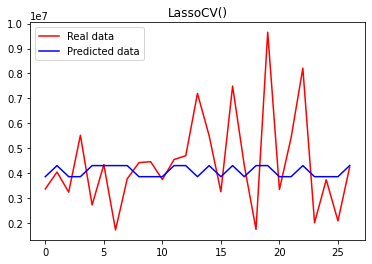

Lasso()
1918585.2179957828
-0.022355051302507922


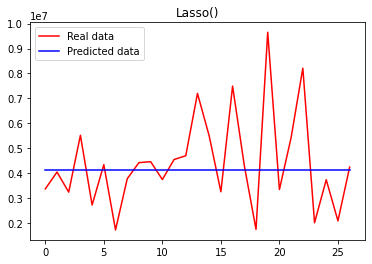

Ridge()
1846966.5788650296
0.0525470927336561


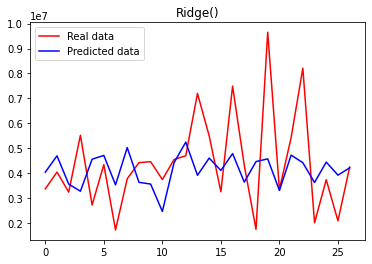

DecisionTreeRegressor()
2500767.6801818497
-0.7369457518052807


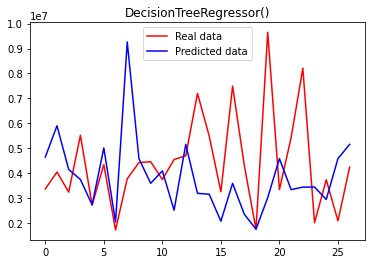

In [ ]:

regressors = [
    KNeighborsRegressor(),
    LinearRegression(),
    LassoCV(),
    Lasso(),
    Ridge(),
    DecisionTreeRegressor()
]
for model in regressors:
  pipeline= Pipeline(steps=[('normalize', MinMaxScaler()), ('model', model)])
  wrapped_model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
  wrapped_model.fit(X_train, y_train)
  yhat = wrapped_model.predict(X_test)
  print(model)
  print(mean_squared_error(y_test,yhat)**(1/2.0))
  print(r2_score(y_test,yhat))
  plt.plot(y_test, color = 'red', label = 'Real data')
  plt.plot(yhat, color = 'blue', label = 'Predicted data')
  plt.title(str(model))
  plt.legend()
  plt.show()

Исходя из метрик, можем сделать вывод, что мы не получим хороший скор для базовых моделей

Дело в том, что наша тренировочная выборка имеет мало данных и надо искать другие подходы к решению задачи

**Для работы с маленькими данными нам надо как-нибудь использовать малое количество данных еще раз:**

    1)ансамблевые методы:

a) бэггинг:

Одинаковые модели обучаются на различных выборках и соответственно получает различные ошибки, затем прогнозы усредняются.
Случайный лес это бэггинг, где за модель выбрано случайное дерево

b) бустинг:

одинаковые модели обучаются последовательно на различных выборках и исправляют ошибки предыдущей модели, например градиентный бустинг
реализованный в xgboost и LightGBM

    2.байесовский подход

За счет того что мы предсказывая какое-то априорное распределение, а затем апосториарную вероятность можем опять считать априорным распределением Байесовский подход хорошо подходит к работе с маленькими данными. Так например relevance vector machine реализовано на этом подходе, однако требует большой вычислительной мощности для большого объема данных

    3.семплинг

способ выбора данных так, чтобы бороться с несбаланасированными и неудобными данными
при малых данных нам поможет оверсепмлинг:
random oversampling, просто рандомное увеличение обьектов класса меньшинств
smote, это добавление элементов в непосредественной близости к классу меньшей размерности
adasyn, обобщение smote, который смотрит на разные классы меньшинств и потом решает что добавлять
svm-smote, smote который использует svm алгоритм для определения точек 

Note:Однако семплинг больше применим в задаче классификации, а не регрессии


#Ансамбли

Попробую ансамбли с деревьями реализованные в sklearn

У деревьев есть гиперпараметры, которые желательно было бы настроить для хороших результатов, так я буду использовать gridSearchCV

Подберем гиперпараметры для **RandomForestRegressor()**

In [ ]:
param_grid = { 
    'n_estimators': [100,200,300,500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': range (2,10, 1)
}
clf = GridSearchCV(estimator=ensemble.RandomForestRegressor(), 
                   param_grid=param_grid,
                   scoring='neg_mean_squared_error', 
                   verbose=0)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
Lowest RMSE:  1646259.7925079262


1744224.7812478724
0.155023824583027


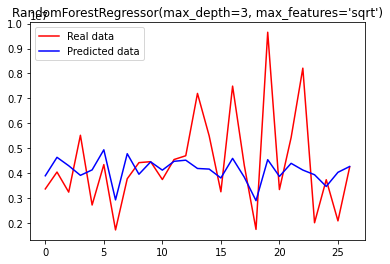

In [ ]:
rft = RandomForestRegressor(n_estimators=100, max_features='sqrt',max_depth=3).fit(X_train,y_train)
yhat=rft.predict(X_test)
print(mean_squared_error(y_test,yhat)**(1/2.0))
print(r2_score(y_test,yhat))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(yhat, color = 'blue', label = 'Predicted data')
plt.title(rft)
plt.legend()
plt.show()

**ExtraTreesRegressor**

In [ ]:
param_grid={'n_estimators':[3,10,30,40,50],'max_features':[2,4,6,8]},
{'n_estimators':[3,10],'max_features':[2,3,4]}
forest_reg_extra=ExtraTreesRegressor()
rnd_grid_search_extra=GridSearchCV(forest_reg_extra,param_grid,scoring='neg_mean_squared_error',cv=10)
rnd_grid_search_extra.fit(X_train,y_train)
print("Best parameters:", rnd_grid_search_extra.best_params_)
print("Lowest RMSE: ", (-rnd_grid_search_extra.best_score_)**(1/2.0))

Best parameters: {'max_features': 2, 'n_estimators': 50}
Lowest RMSE:  1764210.5811484703


1863639.5797960402
0.035364124213021375


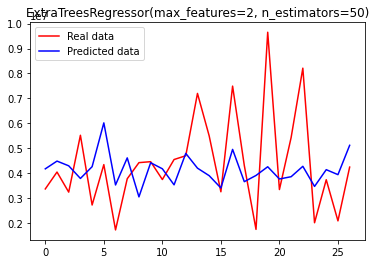

In [ ]:
rnd=ExtraTreesRegressor(n_estimators=50,max_features=2).fit(X_train,y_train)
yhat=rnd.predict(X_test)
print(mean_squared_error(y_test,yhat)**(1/2.0))
print(r2_score(y_test,yhat))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(yhat, color = 'blue', label = 'Predicted data')
plt.title(rnd)
plt.legend()
plt.show()

**gradientBoostingRegressor**

In [ ]:
param_grid_gra={'max_depth': range (2,10, 1),
    'n_estimators': range(40, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

gbr = GridSearchCV(estimator=GradientBoostingRegressor(), 
                   param_grid=param_grid_gra,
                   scoring='neg_mean_squared_error', 
                   verbose=0)
gbr.fit(X_train, y_train)
print("Best parameters:", gbr.best_params_)
print("Lowest RMSE: ", (-gbr.best_score_)**(1/2.0))

Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 40}
Lowest RMSE:  1639241.8319271342


1864766.8351890424
0.03419681711254641


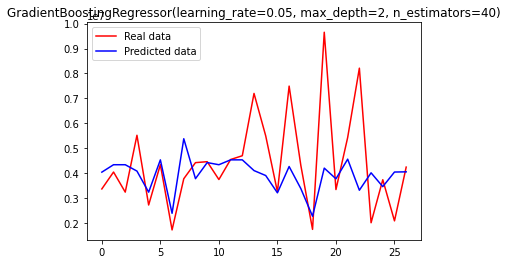

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=40,max_depth=2,learning_rate=0.05).fit(X_train,y_train)
yhat=gbr.predict(X_test)
print(mean_squared_error(y_test,yhat)**(1/2.0))
print(r2_score(y_test,yhat))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(yhat, color = 'blue', label = 'Predicted data')
plt.title(gbr)
plt.legend()
plt.show()

**попробуем xgboost()**

In [ ]:
param_grid_xgboost={'max_depth': range (2,10, 1),
    'n_estimators': range(40, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xlf = GridSearchCV(estimator=xgboost.XGBRegressor(verbosity=0), 
                   param_grid=param_grid_xgboost,
                   scoring='neg_mean_squared_error', 
                   verbose=0)
xlf.fit(X_train, y_train)
print("Best parameters:", xlf.best_params_)
print("Lowest RMSE: ", (-xlf.best_score_)**(1/2.0))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 80}
Lowest RMSE:  1697833.797097858


1922800.3503827897
-0.02685221481870581


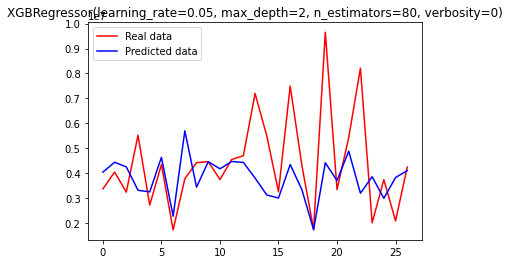

In [ ]:
xg=xgboost.XGBRegressor(n_estimators=80,max_depth=2,learning_rate=0.05,verbosity=0).fit(X_train,y_train)
yhat=xg.predict(X_test)
print(mean_squared_error(y_test,yhat)**(1/2.0))
print(r2_score(y_test,yhat))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(yhat, color = 'blue', label = 'Predicted data')
plt.title(xg)
plt.legend()
plt.show()

**попробуем lightgbm**

In [ ]:


params_lgbm = {
    'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
    'boosting': ['gbdt'],
    'metric': ['l1'],
    'feature_fraction': [.3, .4, .5, 1],
    'num_leaves': [20],
    'min_data': [10],
    'max_depth': [10],
    'n_estimators': [10, 30, 50, 100,150]
}

lgb = lgbm.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb, params_lgbm, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
lgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal feature_fraction: {lgb_regressor.best_params_["feature_fraction"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {-lgb_regressor.best_score_}')

Optimal lr: 0.01
Optimal feature_fraction: 0.5
Optimal n_estimators: 100
Best score: 1681451.9407662726


1824455.0266916917
0.07550219643038703


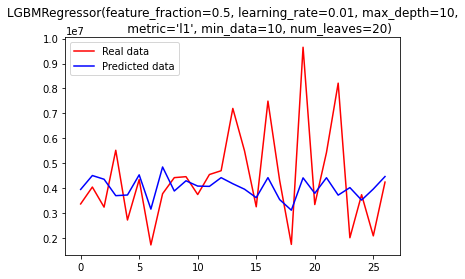

In [ ]:
lgb_model = lgbm.LGBMRegressor(learning_rate=0.01, 
                               metric='l1', feature_fraction=0.5, 
                               num_leaves=20, min_data=10, max_depth=10, 
                               n_estimators=100, n_jobs=-1).fit(X_train,y_train)
yhat=lgb_model.predict(X_test)
print(mean_squared_error(y_test,yhat)**(1/2.0))
print(r2_score(y_test,yhat))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(yhat, color = 'blue', label = 'Predicted data')
plt.title(lgb_model)
plt.legend()
plt.show()

Можно увидеть что лучший результат получен с подобранными гиперпараметрами для случайного леса регрессии

Попробуем улучшить результат применив бэггинг над случайным лесом и бэггинг над градиентным бустингом

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=3,
                                                      max_features='log2'),
                 random_state=0)
1717099.876646967
0.18110037351104402


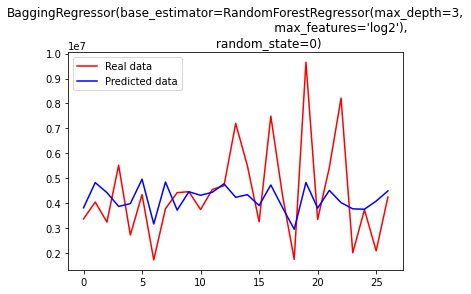

BaggingRegressor(base_estimator=XGBRegressor(learning_rate=0.05, max_depth=2,
                                             n_estimators=80, verbosity=0),
                 random_state=0)
1765060.0298456952
0.13471630585999173


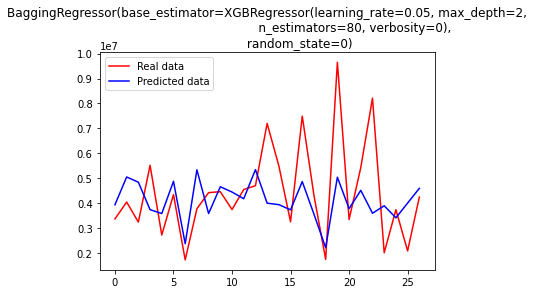

BaggingRegressor(base_estimator=LGBMRegressor(feature_fraction=0.5,
                                              learning_rate=0.01, max_depth=10,
                                              metric='l1', min_data=10,
                                              num_leaves=20),
                 random_state=0)
1789251.7896502924
0.11083475388668784


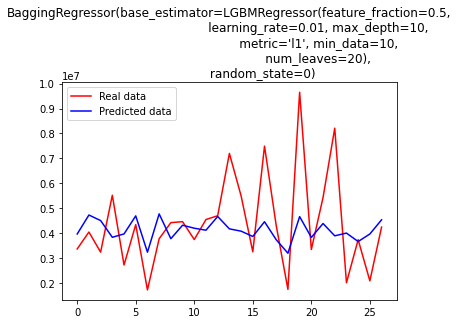

BaggingRegressor(base_estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                          max_depth=2,
                                                          n_estimators=40),
                 random_state=0)
1771963.763881635
0.12793424641124862


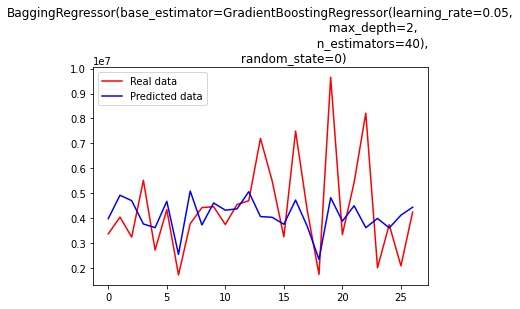

In [ ]:
rf=RandomForestRegressor(n_estimators=100, max_features='log2',max_depth=3)
xg=xgboost.XGBRegressor(n_estimators=80,max_depth=2,learning_rate=0.05,verbosity=0)
lg=lgbm.LGBMRegressor(learning_rate=0.01, 
                               metric='l1', feature_fraction=0.5, 
                               num_leaves=20, min_data=10, max_depth=10, 
                               n_estimators=100, n_jobs=-1)
gbr=GradientBoostingRegressor(n_estimators=40,max_depth=2,learning_rate=0.05)

final_models=[]
not_fitting_model=[]
for model in [rf,xg,lg,gbr]: 
  from sklearn.ensemble import BaggingRegressor
  model=BaggingRegressor(model,n_estimators=10,random_state=0)
  pipeline= Pipeline(steps=[('normalize', StandardScaler()), ('model', model)])
  wrapped_model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
  not_fitting_model.append(wrapped_model)
  wrapped_model.fit(X_train, y_train)
  yhat = wrapped_model.predict(X_test)
  final_models.append(wrapped_model)
  print(model)
  print(mean_squared_error(y_test,yhat)**(1/2.0))
  print(r2_score(y_test,yhat))
  plt.plot(y_test, color = 'red', label = 'Real data')
  plt.plot(yhat, color = 'blue', label = 'Predicted data')
  plt.title(str(model))
  plt.legend()
  plt.show()

Видно, что бэггинг над случайным лесом дал самые лучшие метрики

# байесовский подход

Попробуем байесовский подход, а именно ardregression.
В ARD для каждого коэффициента выводится апостериорная оценка дисперсии, и затем коэффициенты с маленькой дисперсией обнуляются.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

1859663.8409850618
0.03947548731286066


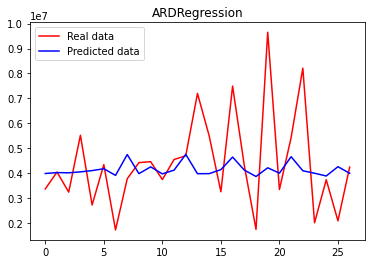

In [ ]:
ardr=ARDRegression()
ardr.fit(X_train,y_train)
y_pred=ardr.predict(X_test)
print(mean_squared_error(y_test,y_pred)**(1/2.0))
print(r2_score(y_test,y_pred))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('ARDRegression')
plt.legend()
plt.show()

kernel- метод RVM это байесовский аналог метода опорных векторов, однако неплохо работает с маленькими данными и не переобучается. Здесь применяется ARD к SVM

In [ ]:
!pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip

1793726.80050329
0.10638149580236578


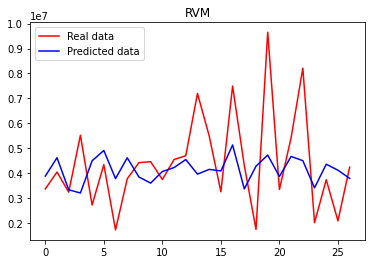

In [ ]:
from skrvm import RVR
clf = RVR(kernel='linear')
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
print(mean_squared_error(y_test,y_pred)**(1/2.0))
print(r2_score(y_test,y_pred))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('RVM')
plt.legend()
plt.show()

Видим, что метод релевантных векторов тоже выдает неплохие метрики

Попробуем votingRegressor, соберем беггинг над случайным лесом, беггинг над xgboost, rvm и случаный лес

1729632.3880495497
0.1691030265985407


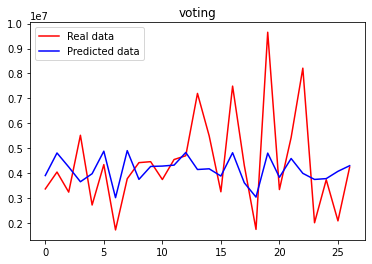

In [ ]:
er = VotingRegressor([('rf', not_fitting_model[0]), ('r3', not_fitting_model[1]), ('2',RVR(kernel='linear')),('3',RandomForestRegressor(n_estimators=100, max_features='sqrt',max_depth=3)),
                      ]) 
er.fit(X_train_sc,y_train)
y_pred = er.predict(X_test_sc)
print(mean_squared_error(y_test,y_pred)**(1/2.0))
print(r2_score(y_test,y_pred))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('voting')
plt.legend()
plt.show()

Получили неплохие результаты, но всё еще хуже чем просто беггинг над случайным лесом

#**Попробуем нейронные сети**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

Для начала попробуем полносвязную нейросеть

In [ ]:

model_nn = keras.models.Sequential()
model_nn.add(layers.Dense(32, input_dim=17, activation='relu'))
model_nn.add(layers.Dense(32,activation='relu'))
model_nn.add(layers.Dense(32,activation='relu'))
model_nn.add(layers.Dense(32,activation='relu'))
model_nn.add(layers.Dense(1))
model_nn.compile(optimizer='adam', loss='mse', metrics=['mse'])
model_nn.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 32)                576       
                                                                 
 dense_93 (Dense)            (None, 32)                1056      
                                                                 
 dense_94 (Dense)            (None, 32)                1056      
                                                                 
 dense_95 (Dense)            (None, 32)                1056      
                                                                 
 dense_96 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = model_nn.fit(X_train_sc, 
                    y_train, 
                    epochs=300, 
                    batch_size=5,verbose=0)


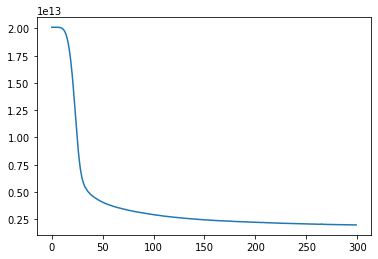

In [ ]:
plt.plot(history.history['mse'])

здесь видим что лосс прекращает резко падать и поэтому для того чтобы не переобучить модель мы взяли 300 эпох

1947210.0577539196
-0.05308922024055085


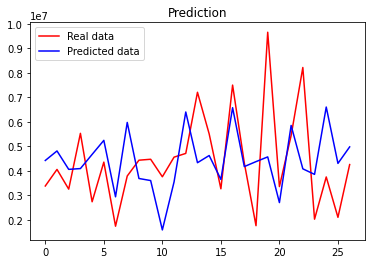

In [ ]:
y_pred = model_nn.predict(X_test_sc)
print(mean_squared_error(y_test,y_pred)**(1/2.0))
print(r2_score(y_test,y_pred))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

Попробуем сверточную 1д нейросеть

In [ ]:
sample_size = X_train_sc.shape[0] 
features = X_train_sc.shape[1]
input_dimension = 1 
train_data_reshaped = X_train_sc.reshape(sample_size,features,input_dimension)
test_data_reshaped = X_test_sc.reshape(X_test_sc.shape[0],X_test_sc.shape[1],1)
n_features = train_data_reshaped.shape[1]
n_size  = train_data_reshaped.shape[2]  
model_cnn = keras.Sequential(name="model_conv1D")
model_cnn.add(keras.layers.Input(shape=(n_features,n_size)))
model_cnn.add(keras.layers.Conv1D(filters=64, kernel_size=9, activation='relu'))
model_cnn.add(keras.layers.Conv1D(filters=32, kernel_size=6, activation='relu'))
model_cnn.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu'))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(32, activation='relu'))
model_cnn.add(keras.layers.Dense(n_size))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model_cnn.compile(loss='mse',optimizer='adam',metrics=['mse'])
model_cnn.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_102 (Conv1D)         (None, 9, 64)             640       
                                                                 
 conv1d_103 (Conv1D)         (None, 4, 32)             12320     
                                                                 
 conv1d_104 (Conv1D)         (None, 3, 16)             1040      
                                                                 
 flatten_34 (Flatten)        (None, 48)                0         
                                                                 
 dense_343 (Dense)           (None, 32)                1568      
                                                                 
 dense_344 (Dense)           (None, 1)                 33        
                                                                 
Total params: 15,601
Trainable params: 15,601
Non-trai

In [ ]:

history = model_cnn.fit(train_data_reshaped, 
                    y_train, 
                    epochs=150, 
                    batch_size=5,verbose=0)

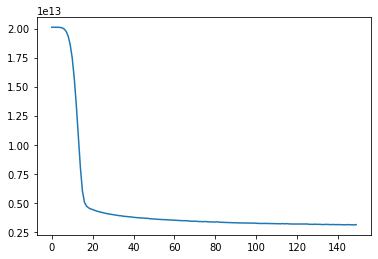

In [ ]:
plt.plot(history.history['mse'])

1902023.663707711
-0.004780945670696646


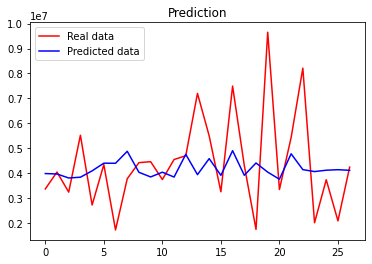

In [ ]:
y_pred = model_cnn.predict(test_data_reshaped)
print(mean_squared_error(y_test,y_pred)**(1/2.0))
print(r2_score(y_test,y_pred))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

Попробуем реализовать беггинг над нейронной сетью

In [ ]:
def model_nn_bag():
  model_nn = keras.models.Sequential()
  model_nn.add(layers.Dense(32, input_dim=17, activation='relu'))
  model_nn.add(layers.Dense(32,activation='relu'))  
  model_nn.add(layers.Dense(32,activation='relu'))
  model_nn.add(layers.Dense(32,activation='relu'))
  model_nn.add(layers.Dense(1))
  model_nn.compile(optimizer='adam', loss='mse', metrics=['mse'])
  model_nn.summary()
  output.clear()
  return model_nn

class BaggedNeuralRegressor:
  def __init__(self, B,model):
    self.B = B
    self.model=model

  def fit(self, X, Y,Epochs,Batch_size):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]
      model_nn=self.model()
      history=model_nn.fit(Xb, Yb,epochs=Epochs, 
                    batch_size=Batch_size,verbose=0)
      plt.plot(history.history['mse'])
      self.models.append(model_nn)
  def predict(self, X):
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X).reshape(len(X))
    return predictions / self.B

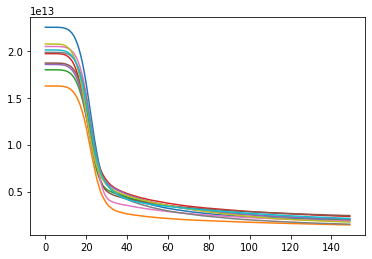

In [ ]:
arr = y_train
y_ktest = StandardScaler().fit_transform(y_test[:, np.newaxis])
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
Epochs = 150
Batch_size =5
bn=BaggedNeuralRegressor(10,model_nn_bag)
bn.fit(X_train_sc,y_train,Epochs,Batch_size)

1982626.3666530647
-0.09174525735071626


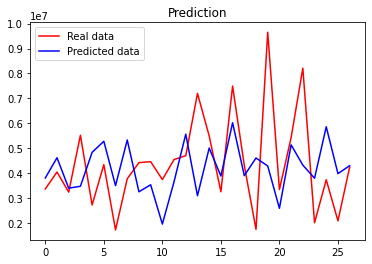

In [ ]:
y_pred = bn.predict(X_test_sc)
print(mean_squared_error(y_test,y_pred)**(1/2.0))
print(r2_score(y_test,y_pred))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

Бэгинг над полносвязной нейронной сетью не дал большого выигрыша в результатах

Таким образом я считаю, что для данной задачи не целесообразно использовать нейронные сети.

Если бы обучающая выборка состояла из большего количества элементов, нейронная сеть могла бы получить результаты лучше, однако мы имеем всего 137 элементов в обучающей выборке.

Нейронные сети лучше использовать для однородной даты, а для табличных значений лучше подходят деревья и их ансамбли.

# Выводы

Выберем модель, которая получила лучшие результат на тренировочной выборке
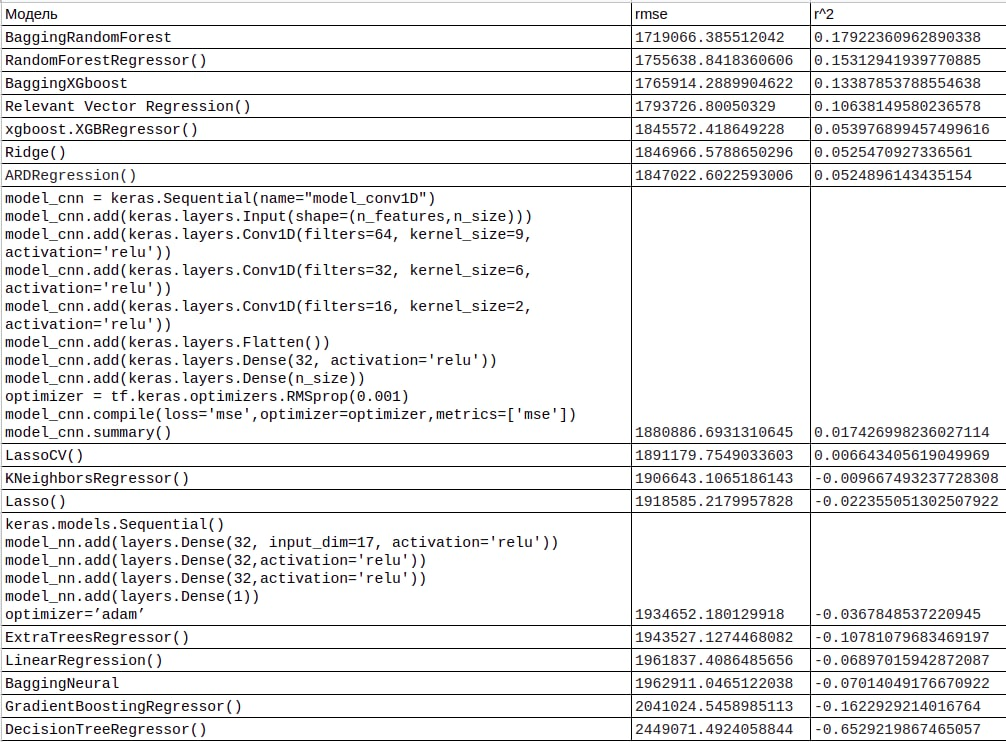



Лучше всех себя показал бэггинг над рандомным лесом

Чтобы проверить насколько хорошо наша модель предсказывает результаты нужно поделиться решением на платформе kaggle

Для этого предобработаем тестовые данные

In [ ]:
data_test['OpenDays']=(pd.to_datetime("07/07/2022")-pd.to_datetime(data_test['Open Date'])).dt.days.astype('int16')
data_test['Year']=pd.to_datetime(data_test['Open Date']).dt.year
data_test['Month']=pd.to_datetime(data_test['Open Date']).dt.month
data_test=data_test.drop('Open Date', axis=1)

In [ ]:
data_test


,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Year,Month
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,4184,2011,1
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,4129,2011,3
2,2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,3172,2013,10
3,3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,4,0,0,0,0,0,0,3349,2013,5
4,4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,3263,2013,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,8219,2000,1
99996,99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,...,0,0,0,4,0,0,0,4007,2011,7
99997,99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,...,5,3,2,4,4,4,2,3477,2012,12
99998,99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,...,0,0,4,0,0,0,0,3190,2013,10


In [ ]:
p_data_test=data_test[p_cols_true]
cat_data_test=data_test[cat_cols]
dummy_features_test = pd.get_dummies(cat_data_test)
time_data_test=data_test[['OpenDays','Year','Month']]
X_for_test = pd.concat([dummy_features_test,time_data_test,p_data_test], axis=1).values
final_model=final_models[0]
# для моделей, которые требуют нормализированных данных
# X_for_test = scaler.transform(X_for_test)
sample_submission['Prediction'] =final_model.predict(X_for_test)
sample_submission.to_csv('./my_submission.csv',index=False)

На платфморе kaggle наша модель показала результат 1788143.99259

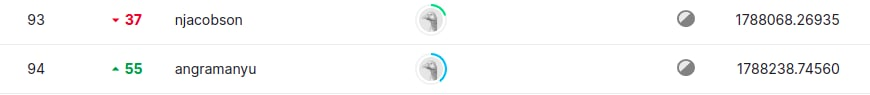

результат входит в топ-100 по данному соревнованию 

#Веб-приложение для демонстрации

В рамках данного задания, было предложено продемонстрировать работу нашей модели на веб-приложении

Для этого я воспользовался фреймворком Flask

Для начала необходимо выбрать и сериализовать модель машинного обучения, чтобы в дальнейшем не обучать модель заново каждый раз.

В качестве модели я выбрал уже обученный бэггинг над случайным лесом

In [ ]:
!pip install dill


In [ ]:
import pickle

In [ ]:
filename = 'model_v1.pk'
with open('./'+filename, 'wb') as file:
	pickle.dump(final_model, file)

Для начала я настроил регистрацию пользователей с помощью модуля flask-login.
Зарегистрированный пользователь добавляется в таблицу базы данных, в которой есть поля:логин, пароль, количество вычислений. 

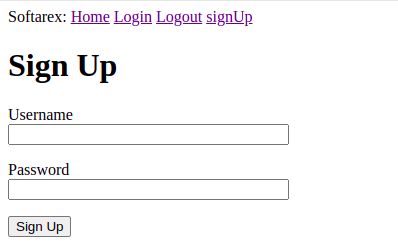

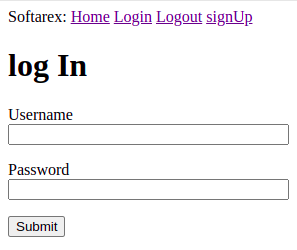

После регистрации пользователя можно зайти на вкладку вычислений, который позволяет загрузить данные и получить предсказания. После успешной загрузки данных, вычисления помещаются в таблицу вычислений.
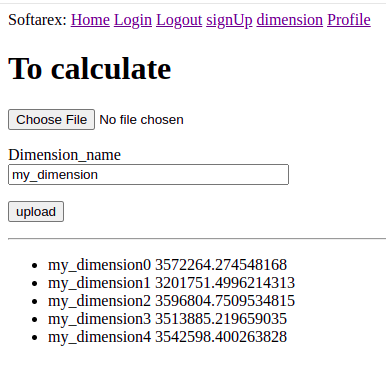

В странице пользователя мы можем увидеть количество успешных вычислений, а также скачать их в формате pdf и json

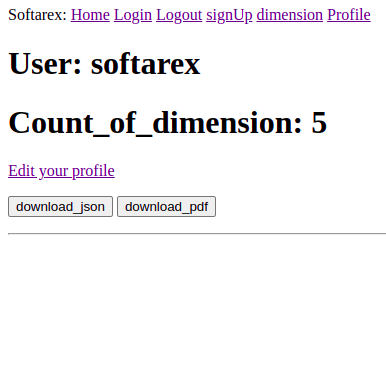

json:
[{"Name of dimension": "my_dimension0", "Dimension": 3572264.274548168}, {"Name of dimension": "my_dimension1", "Dimension": 3201751.4996214313}, {"Name of dimension": "my_dimension2", "Dimension": 3596804.7509534815}, {"Name of dimension": "my_dimension3", "Dimension": 3513885.219659035}, {"Name of dimension": "my_dimension4", "Dimension": 3542598.400263828}]

pdf:

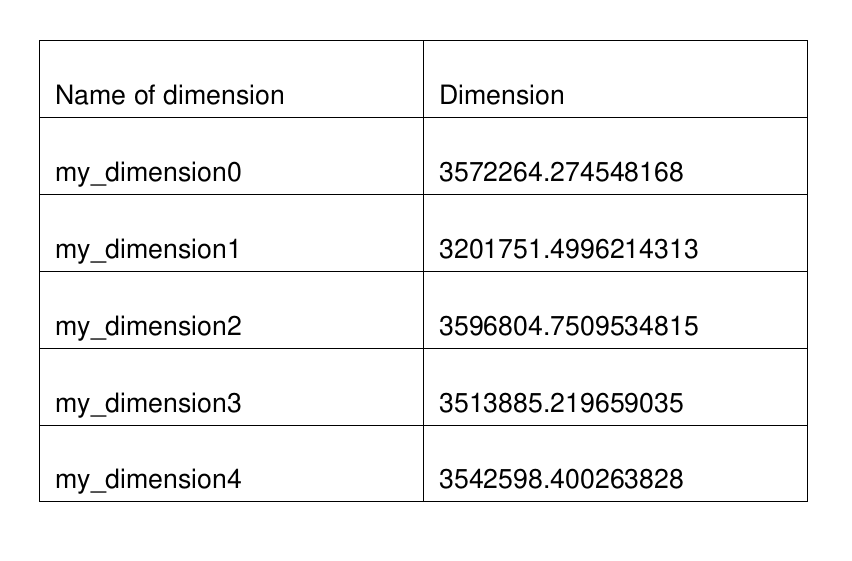

Также у профиля есть возможность поменять свой username или удалить все проведенные вычисления

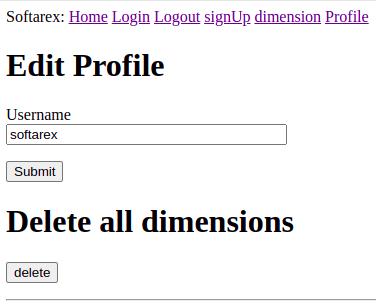

С полным кодом приложения можно ознакомиться по ссылке:
https://github.com/Alexeybary/softarex_application